In [149]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import os

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Daily Generated Data

In [150]:
# Read in the Daily_Generated_Data.csv file
daily = pd.read_csv('Daily_Generated_Data.csv')

# For the daily data, calculate the level derivative and the water difference
waterDifference = daily['Total Rainfall']*40452 - daily['Average Flow Rate']*86400
daily['Water Difference'] = waterDifference

# Calculate the derivative of the water level for each day. Don't ask why it's calculated this way - Python was just being a pain.
levelDerivative = []
previous = daily['Average Water Level'][0]
flag = True
for i in daily['Average Water Level']:
    diff = i - previous
    if not flag:
        levelDerivative.append(diff)
    flag = False
    previous = i
levelDerivative.append(0)
daily['level_derivative'] = levelDerivative
daily.describe()

,Total Rainfall,Average Flow Rate,Average Water Level,Water Difference,level_derivative
count,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000
mean,5.500868,3.838529,0.526824,-1.091278e+05,0.000044
std,22.362362,5.381587,0.273722,8.886281e+05,0.225648
min,0.000000,0.007000,0.119000,-4.675613e+06,-2.206000
25%,0.000000,0.770750,0.329000,-2.699568e+05,-0.094000
50%,1.200000,2.190500,0.477000,-7.856880e+04,-0.002500
75%,6.600000,4.918250,0.661000,1.551060e+04,0.076250
max,865.400000,54.865000,2.379000,3.199854e+07,1.782000


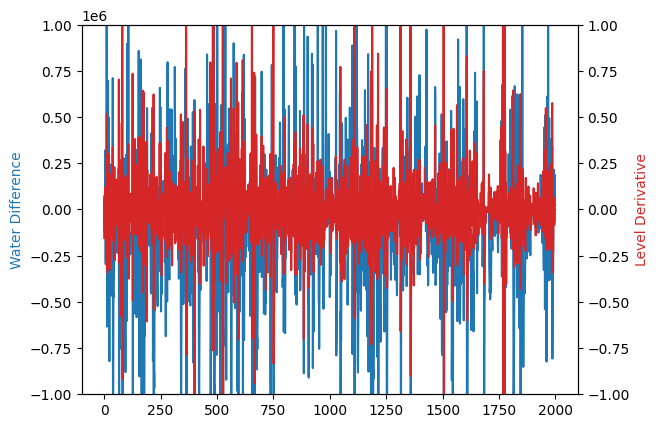

In [151]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(daily['Water Difference'].iloc[0:2000])
ax1.set_ylabel('Water Difference', color='tab:blue')
ax1.set_ylim(-1000000, 1000000)
ax2 = ax1.twinx()
ax2.plot(daily['level_derivative'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Derivative', color='tab:red')
ax2.set_ylim(-1, 1)
plt.show()

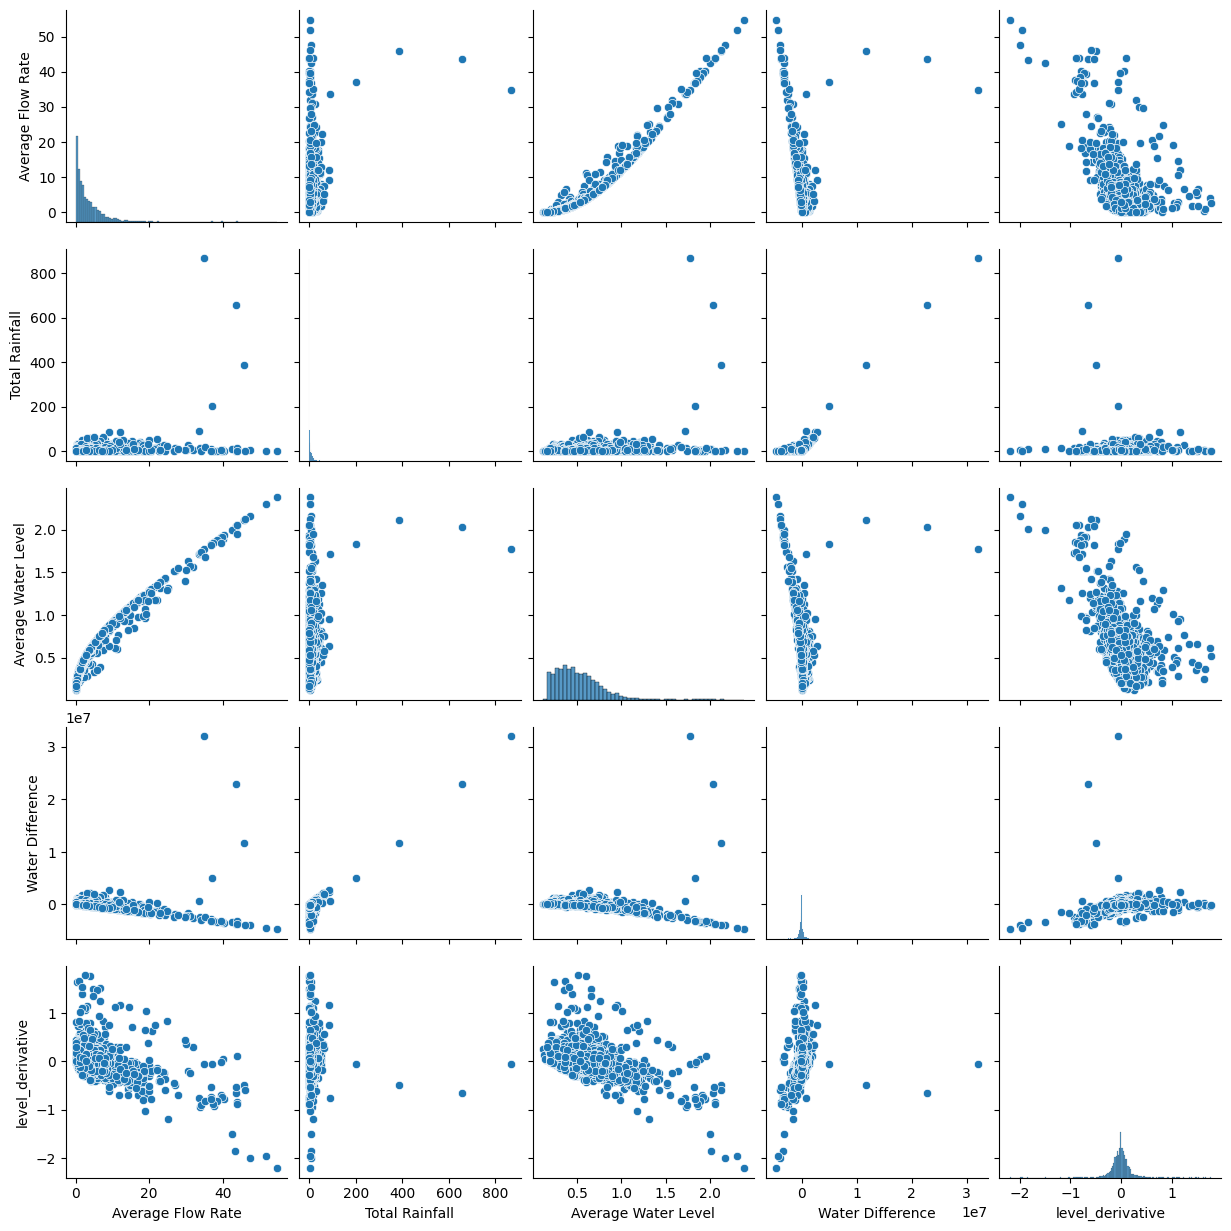

In [152]:
cols = ['Average Flow Rate', 'Total Rainfall', 'Average Water Level', 'Water Difference', 'level_derivative']
sns.pairplot(daily[cols], height=2.5)

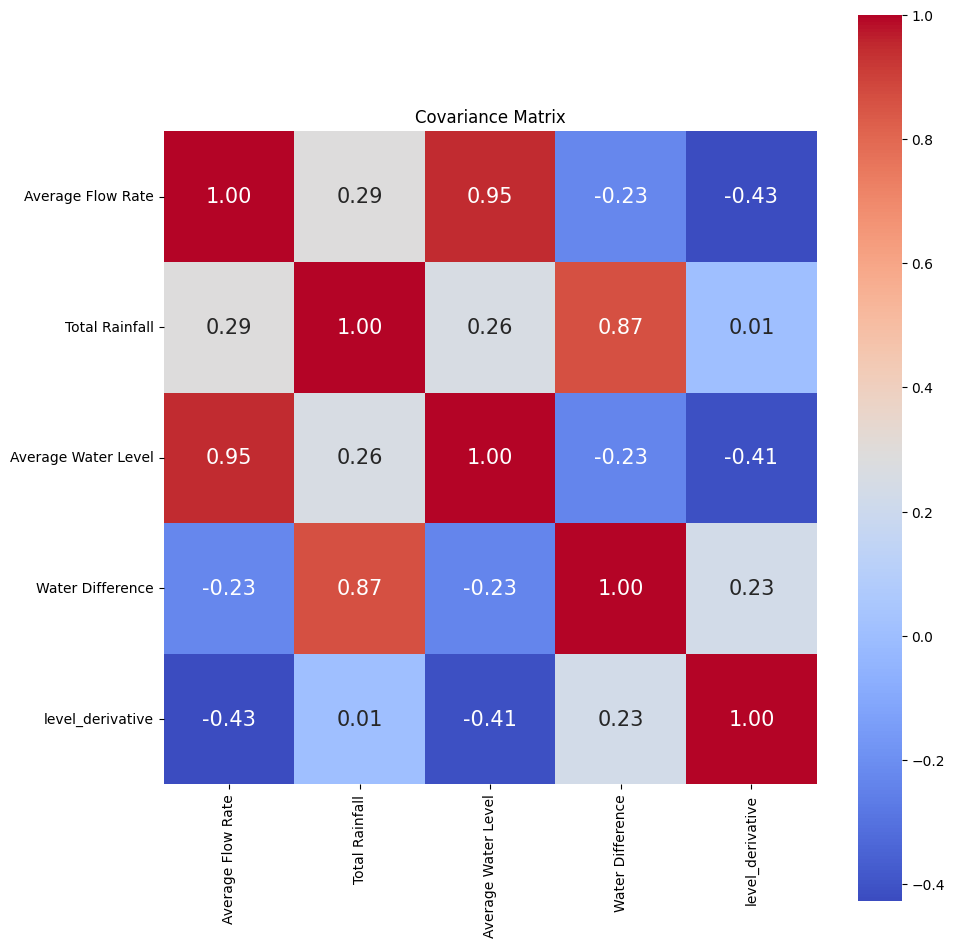

In [153]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(daily[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

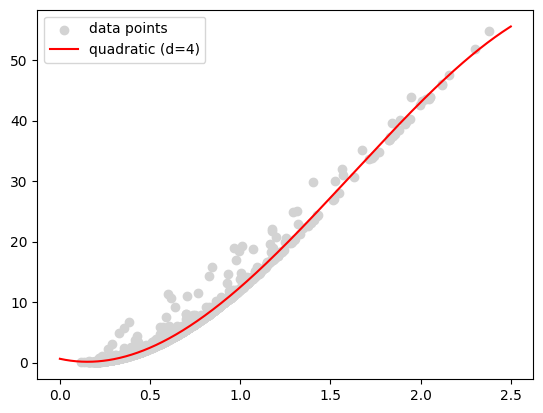

In [154]:
# Fit a polynomial curve to the data
X = daily['Average Water Level'].values.reshape(-1, 1)
y = daily['Average Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='o')

x = np.linspace(0, 2.5, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='quadratic (d=4)', color='red')

plt.legend(loc='upper left')
plt.show()

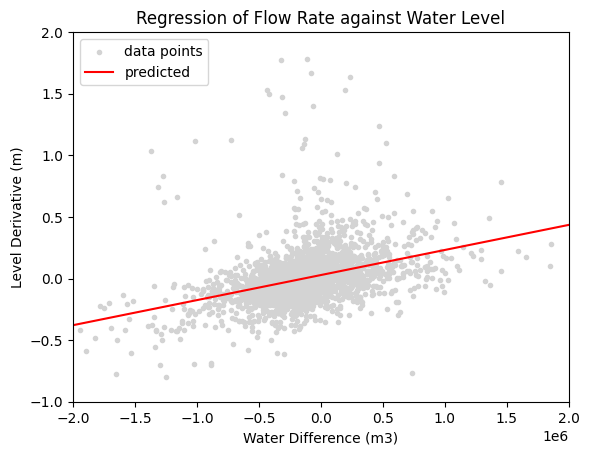

In [155]:
# Remove days with water difference > 2000000 and > 2000000
typical = daily[daily['Water Difference'] < 2000000]
typical = typical[typical['Water Difference'] > -2000000]

# Fit a polynomial curve of Water difference (independent) and level derivative (dependent)
X = typical['Water Difference'].values.reshape(-1, 1)
y = typical['level_derivative'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=1)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(-2000000, 2000000, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.xlim(-2000000, 2000000)
plt.ylim(-1, 2)

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Difference (m3)')
plt.ylabel('Level Derivative (m)')
plt.show()

# Quarter-Hourly Generated Data

In [156]:
# Read in the Quarter_Hourly_Generated_Data.csv file
quarter_hourly = pd.read_csv('Quarter_Hourly_Generated_Data.csv')

waterDifference = quarter_hourly['Rainfall']*40452 - quarter_hourly['Flow Rate']*900
quarter_hourly['Water Difference'] = waterDifference

levelDerivative = []
previous = quarter_hourly['Water Level'][0]
flag = True
for i in quarter_hourly['Water Level']:
    diff = i - previous
    if not flag:
        levelDerivative.append(diff)
    flag = False
    previous = i
levelDerivative.append(0)
quarter_hourly['level_derivative'] = levelDerivative
quarter_hourly.describe()

,Rainfall,Flow Rate,Water Level,Water Difference,level_derivative
count,298752.000000,298752.000000,298752.000000,2.987520e+05,2.987520e+05
mean,0.057301,3.838533,0.526827,-1.136751e+03,1.338903e-08
std,0.791207,6.121447,0.301898,3.190290e+04,2.638675e-02
min,0.000000,0.000000,0.100000,-5.447700e+04,-2.500000e+00
25%,0.000000,0.623000,0.318000,-3.705300e+03,-2.000000e-03
50%,0.000000,2.043000,0.474000,-1.431900e+03,0.000000e+00
75%,0.000000,4.809000,0.664000,-2.529000e+02,1.000000e-03
max,163.000000,60.530000,2.600000,6.539199e+06,2.500000e+00


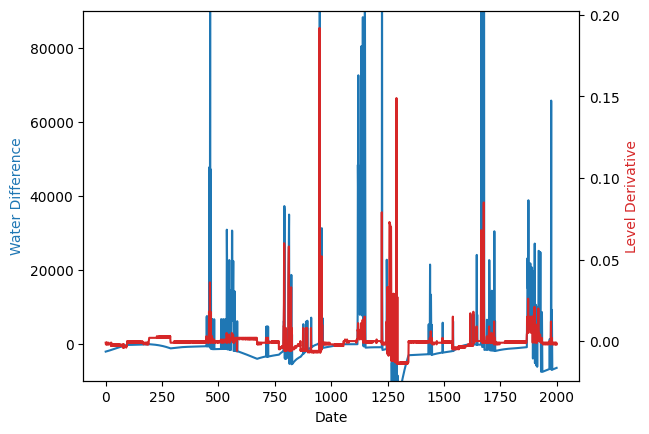

In [161]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(quarter_hourly['Water Difference'].iloc[0:2000])
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Difference', color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(quarter_hourly['level_derivative'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Derivative', color='tab:red')

# Set the level derivative axis to -0.005 to 0.030
ax1.set_ylim(-10000, 90000)

plt.show()

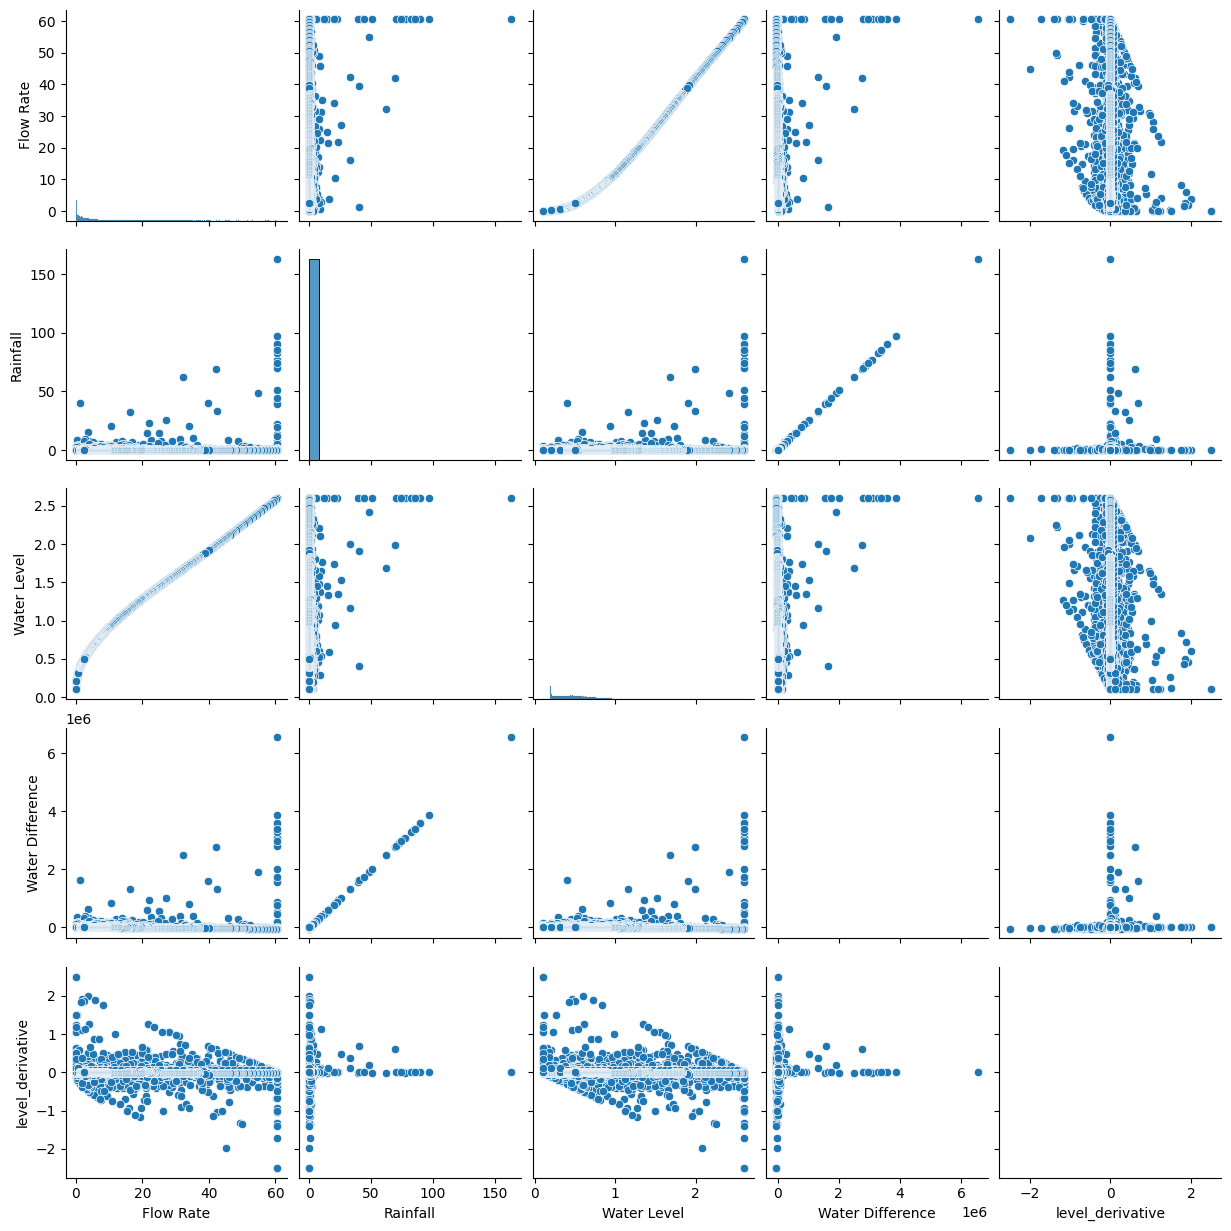

In [158]:
cols = ['Flow Rate', 'Rainfall', 'Water Level', 'Water Difference', 'level_derivative']
sns.pairplot(quarter_hourly[cols], height=2.5)

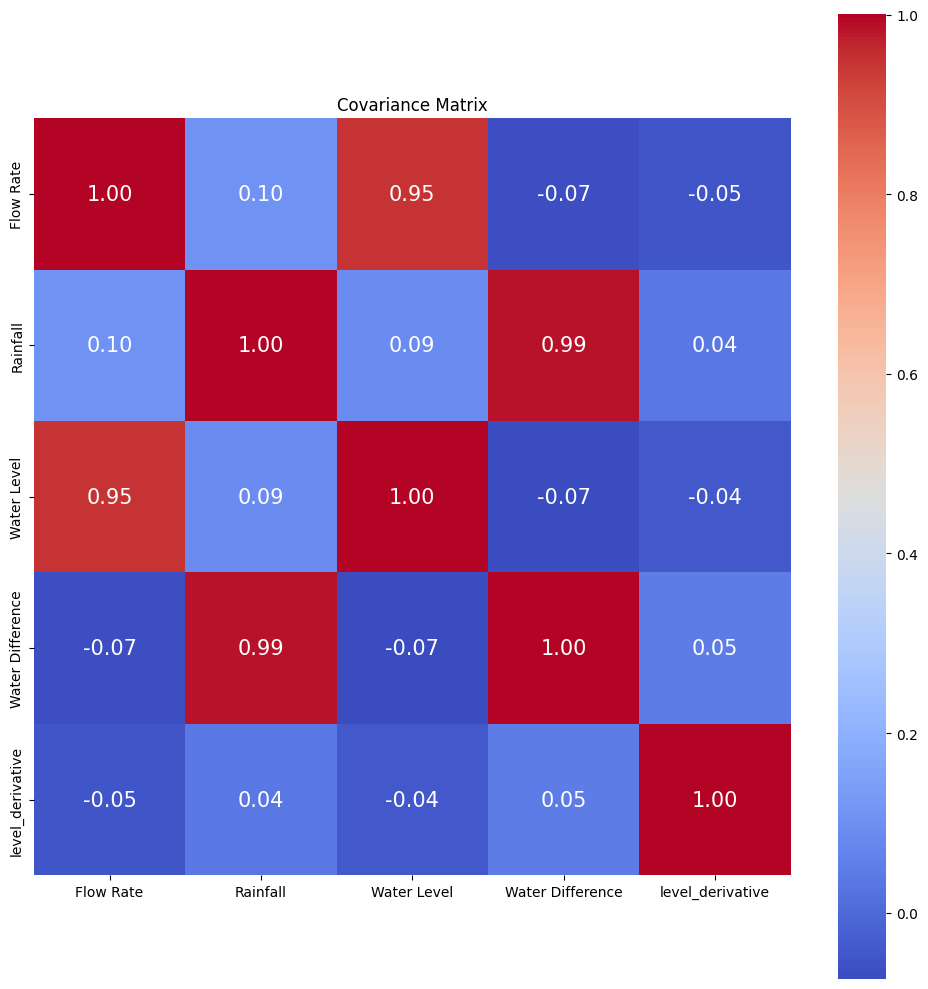

In [159]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(quarter_hourly[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

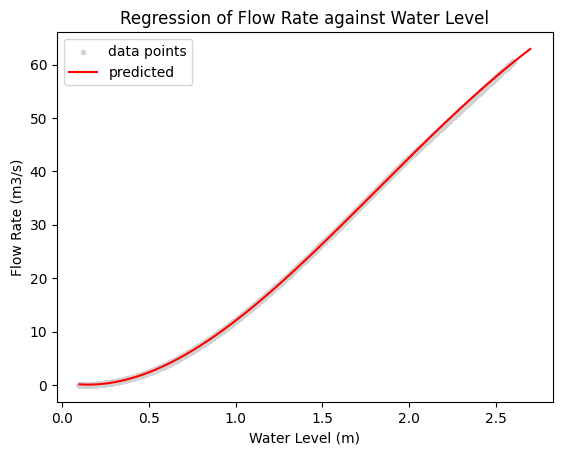

In [162]:
# Fit a polynomial curve to the data
X = quarter_hourly['Water Level'].values.reshape(-1, 1)
y = quarter_hourly['Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(0.1, 2.7, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Level (m)')
plt.ylabel('Flow Rate (m3/s)')
plt.show()